<a href="https://colab.research.google.com/github/nicolerene91/Python_Notebook_Sewell/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The optimal k value is 13 (with 10-fold cross-validation)
GridSearchCV confirms the optimal k value is 13



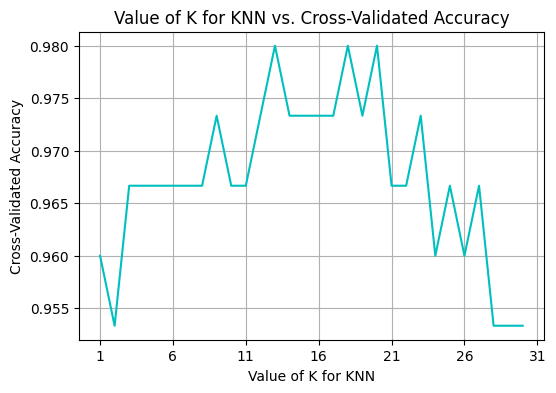

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Load the Iris dataset directly from sklearn.datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Create a range of k values to evaluate (from 1 to 30)
k_range = range(1, 31)

# Create empty lists to store cross-validation scores and the mean accuracy
cv_scores = []
mean_accuracy = []

# Loop through the k values and perform 10-fold cross-validation for each
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)
    cv_scores.append(scores)
    mean_accuracy.append(scores.mean())

# Determine the optimal k value with the highest mean accuracy
optimal_k = k_range[np.argmax(mean_accuracy)]

# Plot 'Value of K for KNN' vs. 'Cross-Validated Accuracy'
plt.figure(figsize=(6, 4))
plt.plot(k_range, mean_accuracy, linestyle='-', color='c')
plt.title('Value of K for KNN vs. Cross-Validated Accuracy')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(np.arange(1, 32, step=5))  # Set x-axis positions to intervals of 5
plt.grid(True)

print(f"The optimal k value is {optimal_k} (with 10-fold cross-validation)")

# Use GridSearchCV to confirm the optimal parameter
param_grid = {'n_neighbors': k_range}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)
grid_search.fit(X, y)
grid_optimal_k = grid_search.best_params_['n_neighbors']

print(f"GridSearchCV confirms the optimal k value is {grid_optimal_k}\n")

plt.show()